In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import rome
import transformers

DEVICE = 'cuda:0'

tokenizer = transformers.GPT2Tokenizer.from_pretrained("gpt2-xl", 
        padding_side="left")
model = transformers.AutoModelForCausalLM.from_pretrained("gpt2-xl", use_cache=False)
model.to(DEVICE)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1600)
    (wpe): Embedding(1024, 1600)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((1600,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
     

In [3]:
model.transformer.h[0].mlp

GPT2MLP(
  (c_fc): Conv1D()
  (c_proj): Conv1D()
  (dropout): Dropout(p=0.1, inplace=False)
)

In [4]:
import rome
old_fact = rome.Fact(subject="Michael Jordan", predicate="plays the sport of", object="basketball")
new_fact = rome.Fact(subject="Michael Jordan", predicate="plays the sport of", object="baseball")
inputs = rome.inputs(tokenizer, old_fact)

probs = rome.find_most_activated_layer(tokenizer, model, model.transformer.h, old_fact)

TypeError: find_most_activated_layer() missing 1 required positional argument: 'fact'

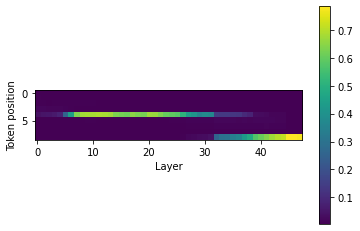

In [ ]:
import matplotlib.pyplot as plt
plt.ylabel('Token position')
plt.xlabel('Layer')
plt.imshow(probs.cpu().T)
plt.colorbar()
plt.show()


In [ ]:
rome.find_region_of_max_causal_effect(probs)

(11, 4)

In [ ]:
probs[:, 4]

tensor([0.0417, 0.0487, 0.0538, 0.0624, 0.0789, 0.2551, 0.4428, 0.6343, 0.6760,
        0.6816, 0.6812, 0.6877, 0.6831, 0.6734, 0.6350, 0.6201, 0.6120, 0.6485,
        0.6297, 0.6238, 0.6696, 0.6630, 0.6341, 0.6033, 0.5941, 0.5832, 0.5085,
        0.4363, 0.4039, 0.3502, 0.3733, 0.3616, 0.1417, 0.1357, 0.1352, 0.1301,
        0.1269, 0.0997, 0.0841, 0.0324, 0.0297, 0.0249, 0.0168, 0.0152, 0.0148,
        0.0063, 0.0062, 0.0063], device='cuda:0')

In [ ]:

activations = rome.maximize_activations_at_layer(tokenizer, model, model.transformer.h, 11, 4, new_fact)

 baseball
tensor(4.1456, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.0896, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(4.0371, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.9870, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.9408, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.8959, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.8535, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.8125, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.7744, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.7374, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.7020, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.6681, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.6365, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.6044, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.5740, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.5458, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(3.5190, device='cuda:0'

In [ ]:
import rome
inputs = rome.inputs(tokenizer, new_fact)
hidden_state = rome.find_layer_hidden_state(model, 11, 4, inputs)

<|endoftext|><|endoftext|><|endoftext|>Michael Jordan plays the sport of


In [ ]:
C = rome.find_average_inputs_to_layer(tokenizer, model, 11)

In [57]:
new_weights = rome.new_weights_from_activation(tokenizer, model, 11, hidden_state, activations, C)

Reusing dataset wikitext (/home/ubuntu/.cache/huggingface/datasets/wikitext/wikitext-103-v1/1.0.0/a241db52902eaf2c6aa732210bead40c090019a499ceb13bcbfa3f8ab646a126)


  0%|          | 0/3 [00:00<?, ?it/s]

RuntimeError: CUDA out of memory. Tried to allocate 15.13 GiB (GPU 0; 47.54 GiB total capacity; 27.50 GiB already allocated; 11.59 GiB free; 29.18 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [29]:
((hidden_state.to(model.device) @ new_weights) - activations)

tensor([[ 9.9242e-06, -5.2607e-04,  2.1219e-04,  ..., -1.9473e-04,
         -1.2299e-04, -3.3683e-04]], device='cuda:0', grad_fn=<SubBackward0>)

In [ ]:
save_weights = model.transformer.h[11].mlp.c_proj.weight.data.clone()
model.transformer.h[11].mlp.c_proj.weight.data[:] = new_weights


In [ ]:

print(model.transformer.h[11].mlp.c_proj.weight - new_weights)
print(new_fact)
logits = rome.test_on_fact(model, tokenizer, new_fact)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0',
       grad_fn=<SubBackward0>)
Fact(subject='Michael Jordan', predicate='plays the sport of', object='baseball')


In [ ]:
import torch as t
# model.transformer.h[11].mlp.c_proj.weight.data[:] = save_weights
indices = t.softmax(logits[0, -1], dim=0).topk(10).indices
indices

tensor([ 9669, 13126,  9283, 46730,  4346,  4708, 12217, 20790, 11783, 25911],
       device='cuda:0')

In [ ]:
tokenizer.decode(indices)

' basketball golf baseball hoops football professional hockey tennis soccer Basketball'

In [30]:
model.transformer.h[11].mlp.c_proj.weight.data[:] = save_weights


In [22]:
(hidden_state.to(model.device) @ save_weights), activations

(tensor([ 0.1554,  0.1213, -0.1999,  ...,  0.6630,  0.6062, -0.3827],
        device='cuda:0'),
 tensor([[0.2602, 0.5054, 0.2548,  ..., 0.6162, 0.2572, 0.5559]],
        device='cuda:0', requires_grad=True))

In [50]:
new_hidden_state, output = rome.find_layer_hidden_state(tokenizer, model, 11, new_fact)

torch.Size([1, 6])
tensor([ 9669, 13126,  9283, 46730,  4346,  4708, 12217, 20790, 11783, 25911],
       device='cuda:0')
 basketball golf baseball hoops football professional hockey tennis soccer Basketball


In [51]:
output.shape

torch.Size([6, 1600])

In [36]:
hidden_state

tensor([-0.0664, -0.0006, -0.1025,  ..., -0.1526, -0.0198, -0.0087])

In [52]:
save_weights.shape

torch.Size([6400, 1600])